In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [19]:
def calculate_rsi(data, window= 4):
    
    # Calculate the difference in price from the previous period
    delta = data.diff()

    # Separate gains (up moves) and losses (down moves)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    # Calculate the exponential moving average of gains and losses
    avg_gain = gain.ewm(com=window - 1, min_periods=window).mean()
    avg_loss = loss.ewm(com=window - 1, min_periods=window).mean()

    # Calculate the Relative Strength (RS)
    rs = avg_gain / avg_loss
    
    # Calculate the final RSI value
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

In [25]:
# --- 1. Data Fetching ---
# Fetch historical data for NVIDIA (NVDA) for the last two years
nvda_data = yf.download('NVDA', start='2025-05-01', end='2025-07-30')

/var/folders/3n/c2cyvjmd52585bcd83mjw9dw0000gp/T/ipykernel_25165/3007423081.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nvda_data = yf.download('NVDA', start='2025-05-01', end='2025-07-30')
[*********************100%***********************]  1 of 1 completed


In [26]:
    # --- 1. Handle possible MultiIndex on columns ---
    # yfinance returns a MultiIndex (field, ticker) if group_by="ticker" is implicit.
if isinstance(nvda_data.columns, pd.MultiIndex):
        # Option A – drop the outer level (works when only one ticker):
    nvda_data = nvda_data.droplevel(1, axis=1)
        # If you ever request multiple tickers, use .xs() or reshape differently.



nvda_data.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-05-01,111.602249,114.932020,111.292273,113.072148,236121500
2025-05-02,114.492050,115.391989,113.362131,114.172073,190194800
2025-05-05,113.812096,114.662035,112.652180,112.902163,133163200
2025-05-06,113.532120,114.732033,110.812307,111.472265,158525600
2025-05-07,117.051872,117.671832,112.272205,113.042156,206758800


In [27]:
# --- 2. RSI Calculation ---
# Calculate RSI on the 'Close' price and add it as a new column
nvda_data['RSI'] = calculate_rsi(nvda_data['Close'])


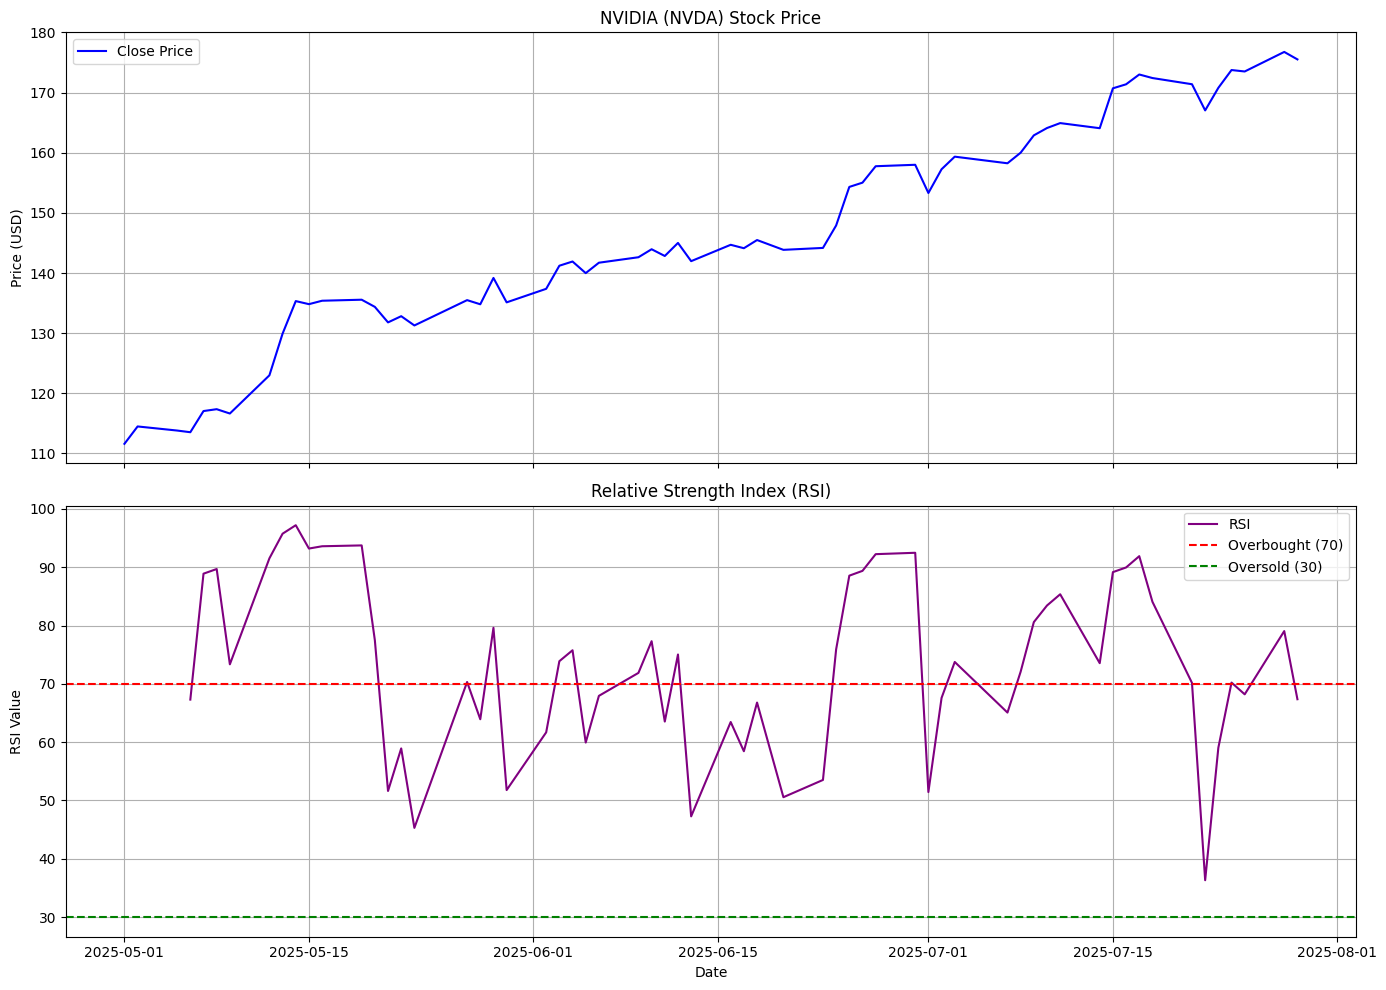

Price            Close        High         Low        Open     Volume  \
Date                                                                    
2025-07-23  170.779999  171.259995  167.970001  169.529999  154082200   
2025-07-24  173.740005  173.830002  171.300003  172.440002  128984600   
2025-07-25  173.500000  174.720001  172.960007  173.610001  122316800   
2025-07-28  176.750000  177.000000  173.970001  174.020004  140023500   
2025-07-29  175.509995  179.380005  175.020004  177.960007  154077500   

Price             RSI  
Date                   
2025-07-23  59.034303  
2025-07-24  70.213824  
2025-07-25  68.201653  
2025-07-28  79.044466  
2025-07-29  67.359779  


In [28]:
# --- 3. Visualization ---
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Closing Price
ax1.plot(nvda_data.index, nvda_data['Close'], label='Close Price', color='blue')
ax1.set_title('NVIDIA (NVDA) Stock Price')
ax1.set_ylabel('Price (USD)')
ax1.legend()
ax1.grid(True)

# Plot 2: RSI
ax2.plot(nvda_data.index, nvda_data['RSI'], label='RSI', color='purple')
# Add horizontal lines for overbought (70) and oversold (30) levels
ax2.axhline(70, linestyle='--', color='red', label='Overbought (70)')
ax2.axhline(30, linestyle='--', color='green', label='Oversold (30)')
ax2.set_title('Relative Strength Index (RSI)')
ax2.set_ylabel('RSI Value')
ax2.set_xlabel('Date')
ax2.legend()
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

# Display the last few rows of the DataFrame to check the data
print(nvda_data.tail())
